#                                 Replication of McDonalds_Case_Study

# Import all Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")


# Step 2) Collecting Data

In [2]:
#df = pd.read_csv('mcdonalds.csv')
df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Step 3) Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df_taste = df.iloc[:,:-4]
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [5]:
for feature in df_taste.columns:
    df_taste[feature] = np.where(df_taste[feature] == 'Yes',1,0)
    df[feature] = np.where(df[feature] == 'Yes',1,0)
    
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [7]:
df_taste.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# Principal Componants Analysis

In [6]:
pca = PCA(n_components=11).fit(np.array(df_taste))
transformed_df = pca.transform(df_taste)
df_PCA = pd.DataFrame(transformed_df, columns=df_taste.columns)
df_PCA

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [10]:
sd_arr = df_PCA.describe().loc['std']
temp_frame = pd.DataFrame({'std':sd_arr})
sd = temp_frame['std']
temp_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
temp_frame['Cumulative_Proportion'] = np.cumsum(temp_frame['variance'])
temp_frame.head()

,std,variance,Cumulative_Proportion
yummy,0.757050,0.299447,0.299447
convenient,0.607456,0.192797,0.492244
spicy,0.504619,0.133045,0.625290
fattening,0.398799,0.083096,0.708386
greasy,0.337405,0.059481,0.767866


In [13]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=df_taste.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.477,-0.155,-0.006,0.116,0.304,-0.108,-0.337,-0.472,0.329,-0.214,0.375
1,0.364,0.016,0.019,-0.034,-0.064,-0.087,-0.611,0.307,0.601,0.077,-0.140
2,-0.304,-0.063,-0.037,-0.322,-0.802,-0.065,-0.149,-0.287,0.024,0.192,-0.089
3,0.055,-0.142,0.198,-0.354,0.254,-0.097,0.119,-0.003,0.068,0.763,0.370
4,-0.308,0.278,0.071,-0.073,0.361,0.108,-0.129,-0.211,-0.003,0.288,-0.729


In [14]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1,-1))
    
col = list(pca_df.columns)
df_PC = pd.DataFrame()

for i in range(0,11):
    df_PC = df_PC.append(pd.DataFrame(X[i],columns=['PC{}'.format(i) for i in range(1,12)]),ignore_index=True)
    
df_PC[''] = pd.Series(col)
df_PC.set_index(keys='',inplace=True)
df_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
,,,,,,,,,,,
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490


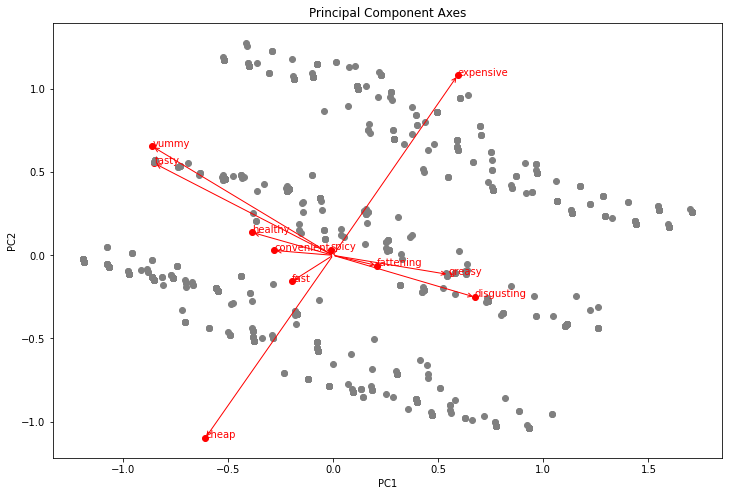

In [15]:
scale = 1.8
plt.figure(figsize=(12,8))
for i,j in enumerate(df_PC.index):
    plt.text(pca.components_[0, :][i]*scale, (pca.components_[1, :][i])*scale, j, color='red')
    plt.annotate('', xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale, color='red')
plt.scatter(data=df_PCA, x='yummy', y='convenient',color='grey');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')

plt.show()

# Step 5) Extracting Segments

# Using K-Means

Text(0, 0.5, 'Sum of Within Cluster Distances')

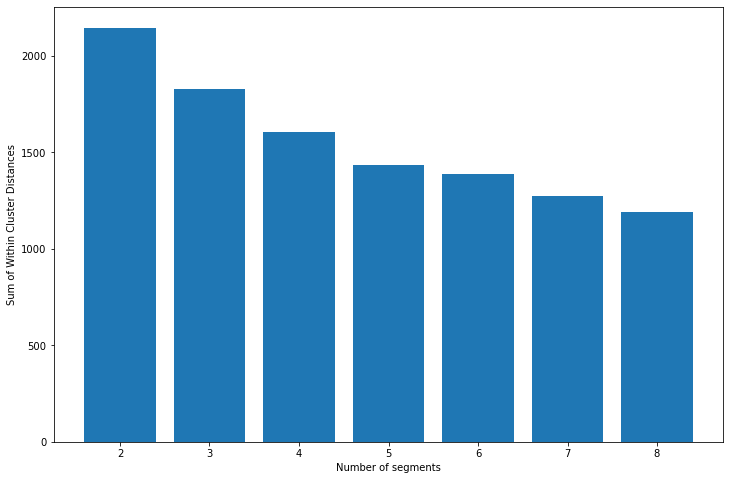

In [18]:
k_range = range(2, 9)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df_taste)
    labels = model.predict(df_taste)
    inertias.append(model.inertia_)
    k_result.append(labels)
    
plt.figure(figsize=(12,8))
plt.bar(range(2, 9), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

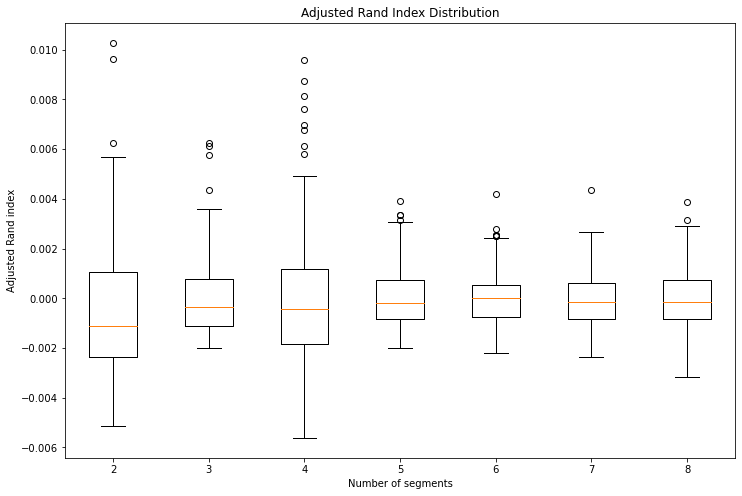

In [19]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [20]:
#creating segment
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_taste)
label4 = model.predict(df_taste)

# 5.2) Using Mixture of Distribution

In [21]:
# using mixture of distribution
score,aic,bic = [],[],[]

models = []
for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(df_taste)
    models.append(model)
    score.append(model.score(df_taste))
    aic.append(model.aic(df_taste))
    bic.append(model.bic(df_taste))

table = pd.DataFrame({
    'k': k_range,
    'LogLik': score,
    'AIC': aic,
    'BIC': bic
})


table

,k,LogLik,AIC,BIC
0,2,5.211510,-14834.648124,-14016.033346
1,3,10.417700,-29807.835653,-28577.272793
2,4,12.699671,-36283.244492,-34640.733550
3,5,14.481847,-41306.248068,-39251.789045
4,6,16.118177,-45905.423109,-43439.016004
5,7,19.551699,-55727.237546,-52848.882359
6,8,17.581113,-49844.714013,-46554.410744


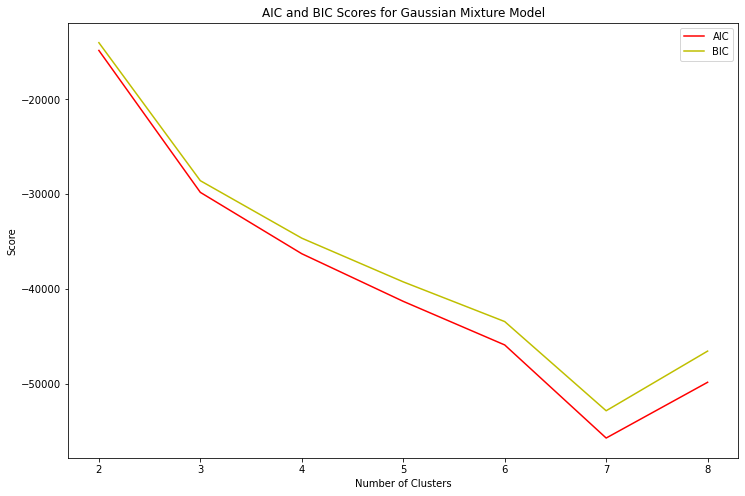

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

In [23]:
g_mixture = GaussianMixture(n_components=4, n_init=10, random_state=0)
g_mixture.fit(df_taste)

cluster_of_g_mixture = g_mixture.predict(df_taste)

KMC = KMeans(n_clusters=4,n_init=10,random_state=0)
KMC.fit(df_taste)
labels = KMC.predict(df_taste)

confusion_matrix = confusion_matrix(labels, cluster_of_g_mixture)

print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[ 31  32  28 232]
 [ 25   0 546   9]
 [ 46 229  29   0]
 [ 34 209   0   3]]


# Step 6) Profiling Segments

In [24]:
df_copy = df_taste.copy()
df_copy['segments'] = label4
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segments
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2


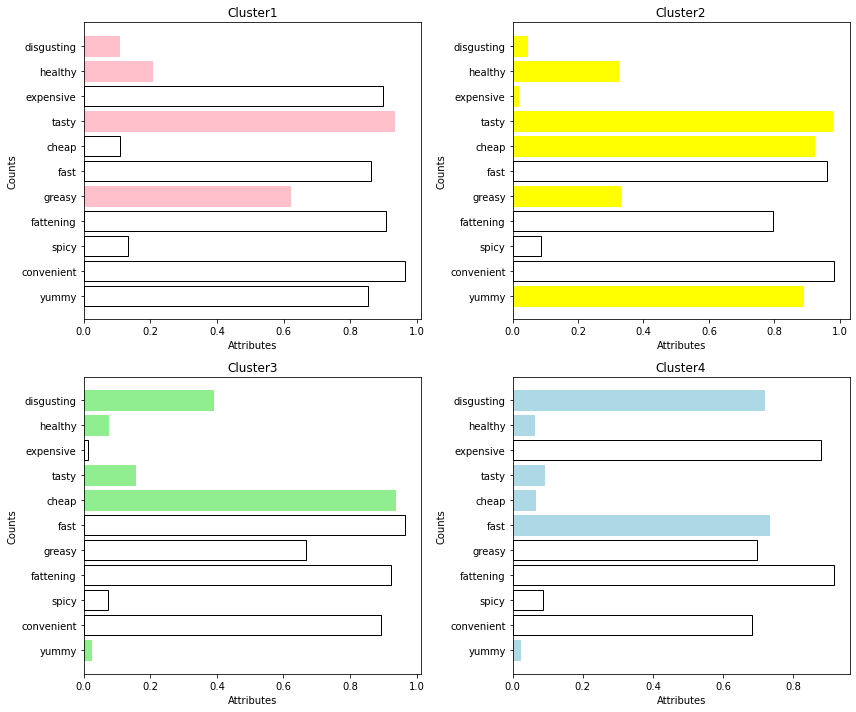

In [25]:
cluster_dict = {
    'Columns': df_taste.columns,
    'Cluster1': np.array(np.zeros(11)),
    'Cluster2': np.array(np.zeros(11)),
    'Cluster3': np.array(np.zeros(11)),
    'Cluster4': np.array(np.zeros(11))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(cluster_list,1):
    if idx==1: 
        k_range = [7, 4, 9,10]
        color="pink"
    elif idx==2:
        k_range = [0,4,6,7,8,9,10]
        color="yellow"
    elif idx==3:
        k_range = [0,6,7,9,10]
        color="lightgreen"
    else:
        k_range = [0, 5,6,7,9,10]
        color="lightblue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)
    

plt.tight_layout()

plt.show()


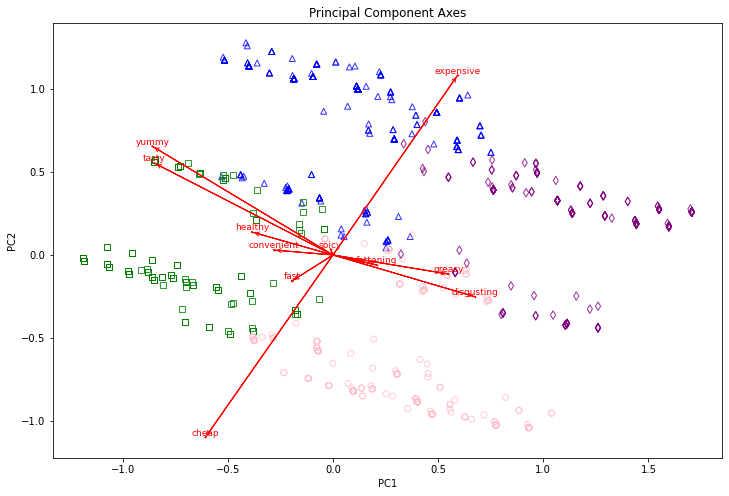

In [26]:
#after step 6
k4 = KMeans(n_clusters=4)
k4.fit(df_PCA)
l4 = k4.predict(df_PCA)

texts = []

markers = ['^', 's', 'o', 'd']

edge_colors = ['blue', 'green', 'pink', 'purple']

height = []
plt.figure(figsize=(12,8))
for i in range(4):
    temp = df_PCA[['yummy', 'convenient']][l4 == i]
    plt.scatter(temp['yummy'], temp['convenient'],label=i,edgecolor=edge_colors[i],marker=markers[i],alpha = 0.8,facecolor='none')

scale = 1.8

for i,j in enumerate(df_PCA.columns):
    text = plt.text(pca.components_[0, :][i]*scale,(pca.components_[1, :][i])*scale,j,color='red',fontsize=9,ha='center',va='bottom',stretch="expanded")
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate('',xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale,s = 0.5,color='red')

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

# Step 7) Describing Segments

In [30]:
# describing segments
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


<Figure size 864x576 with 0 Axes>

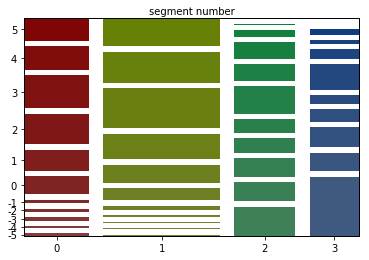

In [31]:
temp_col = df['Like'].replace({
    '+1':1,
    '+2':2,
    '+3':3,
    '+4':4,
    'I love it!+5':5,
    '0': 0,
    '-1': -1,
    '-2':-2,
    '-3':-3,
    '-4':-4,
    'I hate it!-5':-5
})

frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['like'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k: '')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

<Figure size 864x576 with 0 Axes>

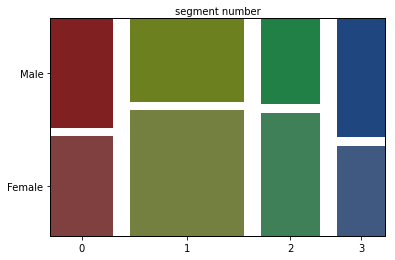

In [40]:
frame = pd.DataFrame({
    'segment': label4,
    'gender': df['Gender']
})

cross_tab = pd.crosstab(frame['segment'], frame['gender'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.06,labelizer = lambda k:'')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

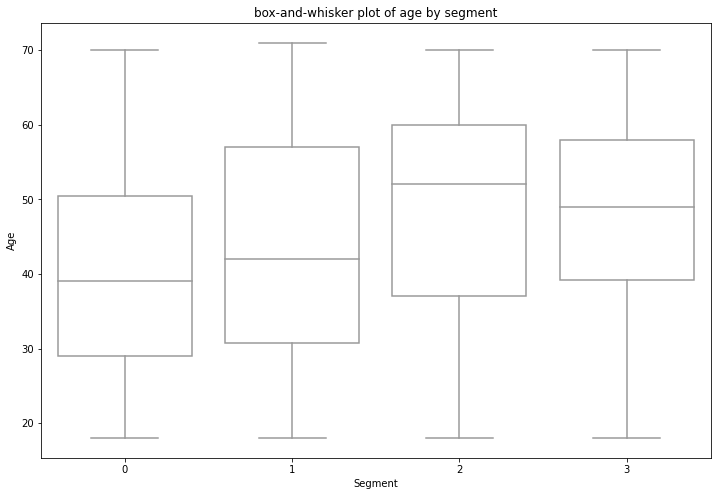

In [33]:
frame = pd.DataFrame({
    'segment': label4,
    'Age': df['Age']
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='segment', y='Age', data=frame,color='white')

plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('box-and-whisker plot of age by segment')

plt.show()

# Step 8) Selecting The Target Segment

In [34]:
frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col,
    'VisitFrequency': df['VisitFrequency'],
    'Gender': df['Gender']
})


visit_freq = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}


frame['VisitFrequencyNumeric'] = frame['VisitFrequency'].map(visit_freq)
frame["GenderNumeric"] = np.where(df['Gender']=='Male',1,0)

visit = frame.groupby('segment')['VisitFrequencyNumeric'].mean()
like = frame.groupby('segment')['like'].mean()
female = frame.groupby('segment')["GenderNumeric"].mean()

visit

segment
0    3.987616
1    4.122414
2    2.677632
3    2.455285
Name: VisitFrequencyNumeric, dtype: float64

In [35]:
like

segment
0    2.139319
1    2.665517
2   -1.513158
3   -2.634146
Name: like, dtype: float64

In [36]:
female

segment
0    0.523220
1    0.398276
2    0.411184
3    0.569106
Name: GenderNumeric, dtype: float64

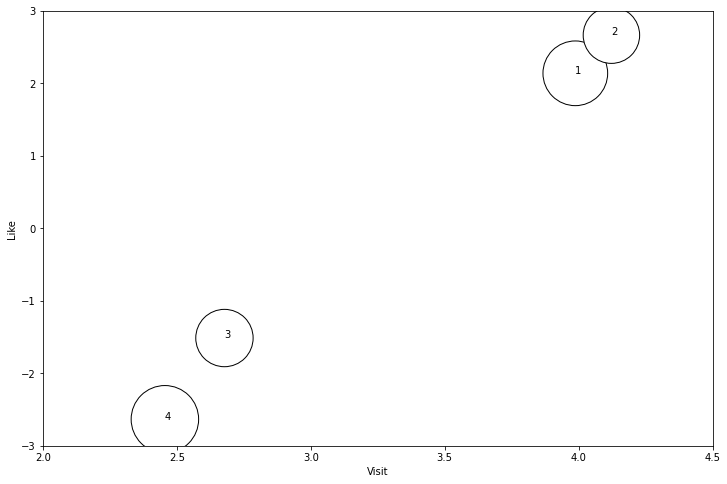

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(visit, like, s=female*8000,color='white',edgecolor="black")

for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i+1))

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Visit')
plt.ylabel('Like')

plt.show()